<a href="https://colab.research.google.com/github/vines2021/Deep-Learning-Sentimental-Analysis/blob/main/Dl_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRU

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dense
from tensorflow.keras.preprocessing import sequence

In [2]:
max_words = 5000
(xt,yt),(xte,yte)= imdb.load_data(num_words=max_words)

max_len =500
xt=sequence.pad_sequences(xt,maxlen=max_len)
xte=sequence.pad_sequences(xte,maxlen=max_len)

model=Sequential()
model.add(Embedding(max_words,100,input_length=max_len))
model.add(GRU(128))
model.add(Dense(1,activation='sigmoid'))

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
batch_size=128
epochs=5
model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 51s 219ms/step - loss: 0.4914 - accuracy: 0.7492
Epoch 2/5
196/196 [==============================] - 28s 142ms/step - loss: 0.2957 - accuracy: 0.8813
Epoch 3/5
196/196 [==============================] - 14s 71ms/step - loss: 0.2429 - accuracy: 0.9053
Epoch 4/5
196/196 [==============================] - 14s 69ms/step - loss: 0.1921 - accuracy: 0.9278
Epoch 5/5
196/196 [==============================] - 12s 62ms/step - loss: 0.1537 - accuracy: 0.9447


In [4]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 12ms/step - loss: 0.3335 - accuracy: 0.8841
accuracy: 0.884119987487793
loss: 0.33348801732063293


In [5]:
history=model.fit(xt,yt,batch_size=batch_size,epochs=epochs)

Epoch 1/5
196/196 [==============================] - 11s 55ms/step - loss: 0.1201 - accuracy: 0.9577
Epoch 2/5
196/196 [==============================] - 8s 42ms/step - loss: 0.0917 - accuracy: 0.9698
Epoch 3/5
196/196 [==============================] - 8s 40ms/step - loss: 0.0751 - accuracy: 0.9740
Epoch 4/5
196/196 [==============================] - 7s 38ms/step - loss: 0.0558 - accuracy: 0.9818
Epoch 5/5
196/196 [==============================] - 9s 45ms/step - loss: 0.0456 - accuracy: 0.9856


In [6]:
train_loss1 = history.history['loss']
train_acc1 = history.history['accuracy']
xc1=range(len(train_acc1))

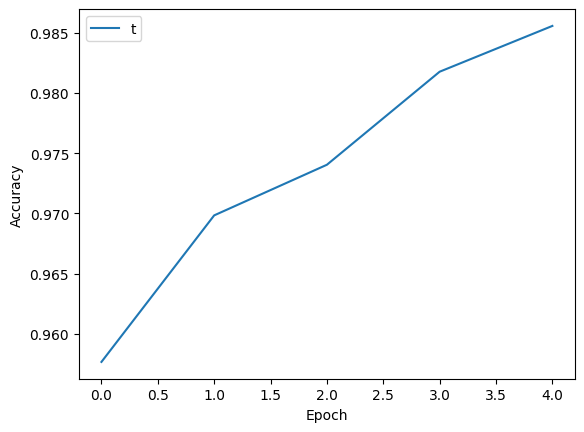

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc1, train_acc1)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# LSTM

In [8]:
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [13]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 5
batch_size = 128

hist=model.fit(xt, yt, epochs=epochs, batch_size=batch_size)

Epoch 1/5
196/196 [==============================] - 34s 160ms/step - loss: 0.5622 - accuracy: 0.7005
Epoch 2/5
196/196 [==============================] - 21s 107ms/step - loss: 0.3219 - accuracy: 0.8688
Epoch 3/5
196/196 [==============================] - 18s 90ms/step - loss: 0.2577 - accuracy: 0.8979
Epoch 4/5
196/196 [==============================] - 12s 62ms/step - loss: 0.2422 - accuracy: 0.9036
Epoch 5/5
196/196 [==============================] - 10s 50ms/step - loss: 0.1865 - accuracy: 0.9302


In [16]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 13ms/step - loss: 0.3167 - accuracy: 0.8770
accuracy: 0.8769999742507935
loss: 0.31674137711524963


In [17]:
train_loss2 = hist.history['loss']
train_acc2 = hist.history['accuracy']
xc2=range(len(train_acc2))

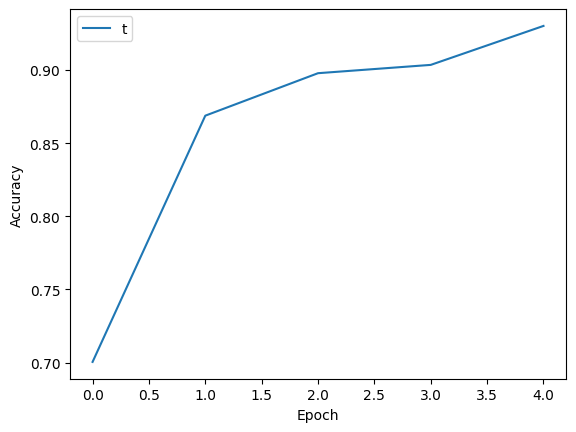

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc2, train_acc2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# RNN

In [19]:
from tensorflow.keras.layers import Embedding,RNN
from keras import layers


In [20]:
model = Sequential()
model.add(Embedding(max_words,100, input_length=max_len))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.add(Dense(units=1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
epochs = 5
batch_size = 128

h=model.fit(xt, yt, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 32s 183ms/step - loss: 0.4944 - accuracy: 0.7549 - val_loss: 0.3360 - val_accuracy: 0.8618
Epoch 2/5
157/157 [==============================] - 21s 133ms/step - loss: 0.2868 - accuracy: 0.8854 - val_loss: 0.3529 - val_accuracy: 0.8530
Epoch 3/5
157/157 [==============================] - 15s 92ms/step - loss: 0.2209 - accuracy: 0.9161 - val_loss: 0.2970 - val_accuracy: 0.8788
Epoch 4/5
157/157 [==============================] - 8s 50ms/step - loss: 0.1938 - accuracy: 0.9272 - val_loss: 0.3189 - val_accuracy: 0.8762
Epoch 5/5
157/157 [==============================] - 9s 55ms/step - loss: 0.1709 - accuracy: 0.9355 - val_loss: 0.3648 - val_accuracy: 0.8496


In [23]:
loss,accuracy=model.evaluate(xte,yte,batch_size=batch_size)
print("accuracy:",accuracy)
print("loss:",loss)

196/196 [==============================] - 3s 13ms/step - loss: 0.3641 - accuracy: 0.8520
accuracy: 0.8519600033760071
loss: 0.3641282320022583


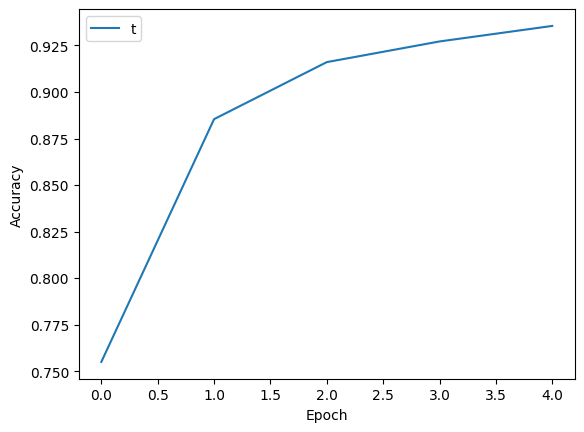

In [24]:
train_loss3 = h.history['loss']
train_acc3 = h.history['accuracy']
xc3=range(len(train_loss3))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend('train')

# PLOT

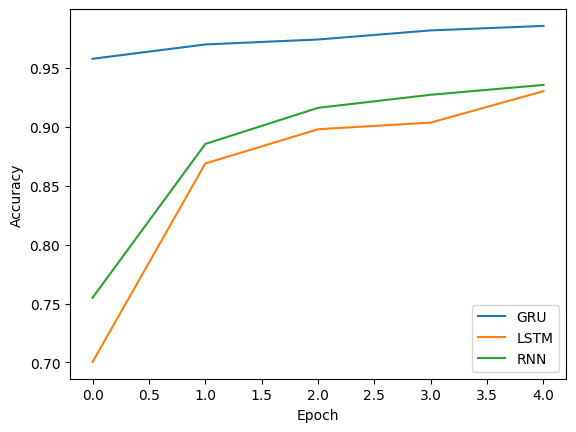

In [25]:
plt.plot(xc1, train_acc1)
plt.plot(xc2, train_acc2)
plt.plot(xc3, train_acc3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["GRU","LSTM","RNN"])